# GRIP The Sparks Foundation

## Task 3: To Explore Unsupervised Machine Learning

### - created by Gaurav Kesari

## K-Means Clustering

In [1]:
# Import the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets



In [2]:
# Load the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target = pd.DataFrame(iris.target)
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


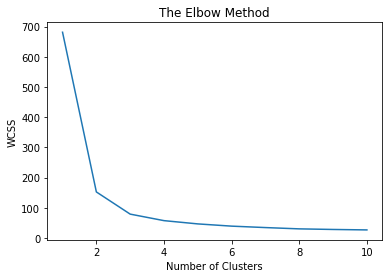

In [4]:
# How to find the optimum number of clusters for k-mean classification using "The Elbow Method"

x = data.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    
# Plot the results onto a line graphh for a better visualiztion

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") # WCSS stands for Within Cluster sum of squares
plt.show()


From the above graph, it can be clearly inferred why this method is called 'The Elbow Method'. As it is in the shape of hand, there is a elbow point which tells the optimum number of clusters. After the elbow point occurs, value of WCSS does not decrease significantly.

### Creating the kmeans classifier model

In [5]:
# Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters

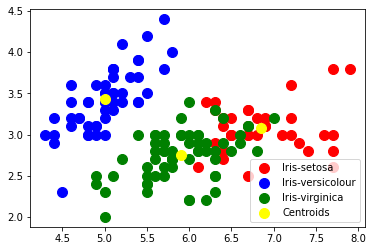

In [6]:
# Visualising the clusters on the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans ==0, 1], s=100, c= 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s =100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Plot the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label ='Centroids')

plt.legend()